In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import  files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [ ]:
csc=pd.read_csv("compresive_strength_concrete.csv")

In [ ]:
csc.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
csc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
csc


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
print(csc.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [ ]:
#csc.dtypes=='object'
for col in csc.columns:
  print(col)

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

#scale all values other than last column
csc.iloc[:,:-1]=min_max_scaler.fit_transform(csc.iloc[:,:-1])

In [ ]:
csc

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176,79.99
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176,61.89
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011,40.27
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000,41.05
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264,44.30
...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,44.28
1026,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176,31.18
1027,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176,23.70
1028,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176,32.77


In [ ]:
csc.shape

(1030, 9)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot

In [ ]:
# split into input and output columns
X, Y = csc.values[:, :-1], csc.values[:, -1]
# split into train and test datasets
XX_train, X_test, YY_train, Y_test = train_test_split(X, Y, test_size=0.3)
# determine the number of input features
n_features = X.shape[1]
n_features

8

In [ ]:
# split into train and validation datasets
X_train, X_val, Y_train, Y_val = train_test_split(XX_train, YY_train, test_size=0.3)

#Now we have
# 50% of data in train set, 30% of data in test set, and 20% of data in validation set
print(len(X_train))
print(len(X_val))
print(len(X_test))

504
217
309


In [ ]:
# define model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(n_features,)))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(4,activation='tanh'))
model.add(Dropout(0.01))
model.add(Dense(1,activation='relu'))

NameError: ignored

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

In [ ]:
# fit the model
history = model.fit(X_train, Y_train, epochs=2000, batch_size=32, verbose=2, validation_data=(X_val,Y_val))
# predict test set

Epoch 1/2000
16/16 - 1s - loss: 1546.2699 - mse: 1546.2699 - val_loss: 1481.6660 - val_mse: 1481.6660
Epoch 2/2000
16/16 - 0s - loss: 1529.9674 - mse: 1529.9674 - val_loss: 1464.1609 - val_mse: 1464.1609
Epoch 3/2000
16/16 - 0s - loss: 1510.3040 - mse: 1510.3040 - val_loss: 1443.3793 - val_mse: 1443.3793
Epoch 4/2000
16/16 - 0s - loss: 1487.5739 - mse: 1487.5739 - val_loss: 1420.3845 - val_mse: 1420.3845
Epoch 5/2000
16/16 - 0s - loss: 1462.6340 - mse: 1462.6340 - val_loss: 1395.0476 - val_mse: 1395.0476
Epoch 6/2000
16/16 - 0s - loss: 1435.6537 - mse: 1435.6537 - val_loss: 1366.7837 - val_mse: 1366.7837
Epoch 7/2000
16/16 - 0s - loss: 1407.0327 - mse: 1407.0327 - val_loss: 1337.7955 - val_mse: 1337.7955
Epoch 8/2000
16/16 - 0s - loss: 1377.4182 - mse: 1377.4182 - val_loss: 1311.3022 - val_mse: 1311.3022
Epoch 9/2000
16/16 - 0s - loss: 1353.5338 - mse: 1353.5338 - val_loss: 1289.2955 - val_mse: 1289.2955
Epoch 10/2000
16/16 - 0s - loss: 1332.8175 - mse: 1332.8175 - val_loss: 1271.9960 

In [ ]:
# predict test set
pred = model.predict(X_test)
# evaluate predictions
score = mean_squared_error(Y_test, pred)
print('MSE: %.3f' % score)

MSE: 37.475


In [ ]:
Y_test

In [ ]:
pred

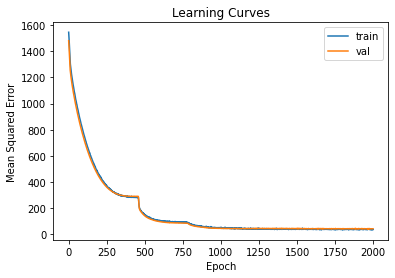

In [ ]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()